In [1]:
#Visualizing Data from Cook County's Felony Cases
#Author: Kaytie Moyer 
#Date: 10/1/2021
#Description: Using intake data from Cook County's felony cases to determine if there is a correlation between the 
#crimes committed the most and gender or ethnicity. We will also look at possible correlations between the results of reviewed cases
#and gender or ethnicity. 

In [2]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [3]:
#import data

df = pd.read_csv('C:/Users/Kaytie/Desktop/School/Regis University/Fall 2021/MSDS 670/Intake.csv')

In [4]:
#dropping unnecessary columns

to_drop = ['CASE_ID','CASE_PARTICIPANT_ID','RECEIVED_DATE','PARTICIPANT_STATUS','INCIDENT_CITY','INCIDENT_BEGIN_DATE',
           'INCIDENT_END_DATE','LAW_ENFORCEMENT_UNIT','ARREST_DATE','FELONY_REVIEW_DATE']
df.drop(to_drop, inplace = True, axis = 1)
df.head(5)

,OFFENSE_CATEGORY,AGE_AT_INCIDENT,RACE,GENDER,LAW_ENFORCEMENT_AGENCY,FELONY_REVIEW_RESULT,UPDATE_OFFENSE_CATEGORY
0,PROMIS Conversion,25.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
1,PROMIS Conversion,22.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
2,PROMIS Conversion,19.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
3,PROMIS Conversion,NaN,Black,Male,CPD SPEC INV-YOUTH,Charge(S) Approved,Attempt Homicide
4,PROMIS Conversion,37.0,Hispanic,Male,SPEC. OPERATIONS,NaN,Narcotics


In [5]:
#changing column names for readability 

new_name = {'OFFENSE_CATEGORY': 'Offense',
           'AGE_AT_INCIDENT': 'Age',
           'RACE': 'Ethnicity',
           'GENDER': 'Gender',
           'LAW_ENFORCEMENT_AGENCY': 'Agency',
           'FELONY_REVIEW_RESULT': 'Review Result',
           'UPDATE_OFFENSE_CATEGORY': 'Offense Update'}
df.rename(columns=new_name, inplace = True)
df.head()

,Offense,Age,Ethnicity,Gender,Agency,Review Result,Offense Update
0,PROMIS Conversion,25.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
1,PROMIS Conversion,22.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
2,PROMIS Conversion,19.0,Black,Male,PROMIS Data Conversion,Approved,Homicide
3,PROMIS Conversion,NaN,Black,Male,CPD SPEC INV-YOUTH,Charge(S) Approved,Attempt Homicide
4,PROMIS Conversion,37.0,Hispanic,Male,SPEC. OPERATIONS,NaN,Narcotics


In [6]:
#checking column names

df.columns

Index(['Offense', 'Age', 'Ethnicity', 'Gender', 'Agency', 'Review Result',
       'Offense Update'],
      dtype='object')

In [7]:
#making a copy of the data to manipulate

df2 = df.copy()

In [8]:
#dropping N/A values

df2.dropna(inplace=True)

In [9]:
#checking value counts 

df2['Offense'].value_counts()

UUW - Unlawful Use of Weapon                 40151
Retail Theft                                 28943
Burglary                                     14742
Aggravated DUI                               14692
Driving With Suspended Or Revoked License    10565
                                             ...  
Violate Bail Bond                               19
Perjury                                         18
Failure To Pay Child Support                    11
Possession of Explosives                         6
PROMIS Conversion                                4
Name: Offense, Length: 86, dtype: int64

In [10]:
#creating the dataframe for highest felonies committed

df_o = df[(df['Offense'] == 'Burglary') | (df['Offense'] == 'Retail Theft') | 
          (df['Offense'] == 'Narcotics') | (df['Offense'] == 'Homicide')].copy()
df_o.value_counts()

Offense       Age    Ethnicity  Gender  Agency              Review Result  Offense Update
Retail Theft  46.0   Black      Male    CHICAGO PD          Approved       Retail Theft      277
              45.0   Black      Male    CHICAGO PD          Approved       Retail Theft      244
              48.0   Black      Male    CHICAGO PD          Approved       Retail Theft      232
              47.0   Black      Male    CHICAGO PD          Approved       Retail Theft      232
              44.0   Black      Male    CHICAGO PD          Approved       Retail Theft      228
                                                                                            ... 
Narcotics     21.0   White      Male    NORTH RIVERSIDE PD  Approved       Narcotics           1
                                        NORTHLAKE PD        Approved       Narcotics           1
                                        RIVER FOREST PD     Approved       Narcotics           1
                                     

In [11]:
#checking value counts for ethnicity 

df2['Ethnicity'].value_counts()

Black                               147806
White [Hispanic or Latino]           35920
White                                33405
Hispanic                              8996
Asian                                 1678
White/Black [Hispanic or Latino]      1098
Unknown                                453
American Indian                        125
Biracial                                61
ASIAN                                    8
Albino                                   1
CAUCASIAN                                1
Name: Ethnicity, dtype: int64

In [12]:
#creating the dataframe for ethnicity

df_e = df[(df['Ethnicity'] == 'Black') | (df['Ethnicity'] == 'White') | (df['Ethnicity'] == 'Hispanic') | 
          (df['Ethnicity'] == 'Asian') | (df['Ethnicity'] == 'American Indian')].copy()
df_e.value_counts()

Offense                                 Age   Ethnicity  Gender  Agency              Review Result               Offense Update                       
UUW - Unlawful Use of Weapon            22.0  Black      Male    CHICAGO PD          Approved                    UUW - Unlawful Use of Weapon             1534
                                        20.0  Black      Male    CHICAGO PD          Approved                    UUW - Unlawful Use of Weapon             1520
                                        19.0  Black      Male    CHICAGO PD          Approved                    UUW - Unlawful Use of Weapon             1473
                                        21.0  Black      Male    CHICAGO PD          Approved                    UUW - Unlawful Use of Weapon             1464
                                        24.0  Black      Male    CHICAGO PD          Approved                    UUW - Unlawful Use of Weapon             1416
                                                      

In [13]:
#checking value counts for review results

df2['Review Result'].value_counts()

Approved                                      187206
Rejected                                       26395
Continued Investigation                        10976
Felony Review                                   2844
Victim Sensitive Interview                       988
Advice                                           529
Disregard                                        432
Warr Ord Warr Issued                              40
Arrest Warrant                                    39
VICTIM SENSITIVE INT                              28
Warrant Exec                                      21
Deputy Override                                   21
Search Warrant                                    16
Chief Judge Assignment To Felony Courtroom        10
Screen Felony                                      6
Charge(S) Approved                                 1
Name: Review Result, dtype: int64

In [14]:
#creating the dataframe for highest counts of review results

df_rr = df[(df['Review Result'] == 'Approved') | (df['Review Result'] == 'Rejected') | 
           (df['Review Result'] == 'Continued Investigation')].copy()
df_rr.value_counts()

Offense                                 Age   Ethnicity  Gender  Agency          Review Result  Offense Update                       
UUW - Unlawful Use of Weapon            22.0  Black      Male    CHICAGO PD      Approved       UUW - Unlawful Use of Weapon             1534
                                        20.0  Black      Male    CHICAGO PD      Approved       UUW - Unlawful Use of Weapon             1520
                                        19.0  Black      Male    CHICAGO PD      Approved       UUW - Unlawful Use of Weapon             1473
                                        21.0  Black      Male    CHICAGO PD      Approved       UUW - Unlawful Use of Weapon             1464
                                        24.0  Black      Male    CHICAGO PD      Approved       UUW - Unlawful Use of Weapon             1416
                                                                                                                                         ... 
Domestic Batte

In [15]:
#Grouping the offenses committed by reported gender

go = df_o.groupby(['Gender']).count()['Offense'].sort_values()

In [16]:
#grouping Ethnicity and Offense

eo = df2.groupby(['Ethnicity','Offense'])

In [17]:
#creating a crosstab for Offenses and Gender

g_offense = pd.crosstab(index = df_o['Offense'],
                          columns = df2['Gender'])
g_offense

Gender,Female,Male,"Male name, no gender given",Unknown
Offense,,,,
Burglary,882,13858,0,2
Homicide,338,3879,0,0
Narcotics,199,1093,1,0
Retail Theft,8247,20692,3,1


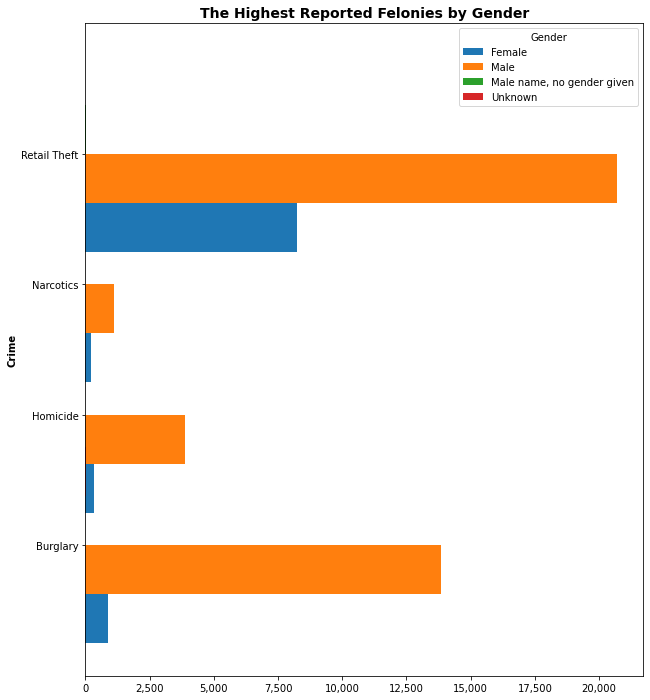

In [18]:
#Visualizing the number of highest reported felonies grouped by gender

ax1 = g_offense.plot(kind = 'barh', figsize = (10,12), zorder = 2, width = 1.5)
    
ax1.set_title('The Highest Reported Felonies by Gender', weight = 'bold', size = 14)
ax1.set_ylabel('Crime', weight = 'bold')
ax1.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [19]:
#creating a crosstab for Offense and Ethnicity

o_e = pd.crosstab(index = df_o['Offense'],
                          columns = df_e['Ethnicity'])
o_e

Ethnicity,American Indian,Asian,Black,Hispanic,White
Offense,,,,,
Burglary,14,118,9487,301,3318
Homicide,4,20,3738,138,303
Narcotics,49,932,113464,599,24432
Retail Theft,28,305,20597,1104,6081


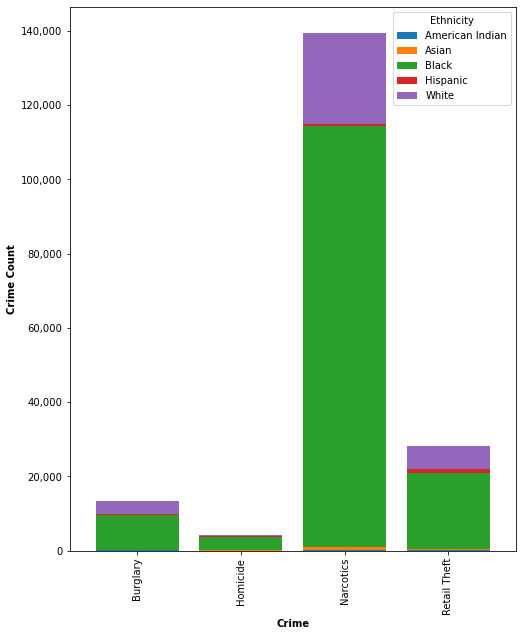

In [20]:
#Visualizing the data for the top number of felonies committed by ethnic group
#as a stacked bar chart

ax2 = o_e.plot(kind = 'bar', figsize = (8,10), width = 0.8, stacked= True)

ax2.set_ylabel('Crime Count', weight = 'bold')
ax2.set_xlabel('Crime', weight = 'bold')
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [21]:
#creating value counts for Review Results from the intake cases

rr = df_rr['Review Result'].value_counts()

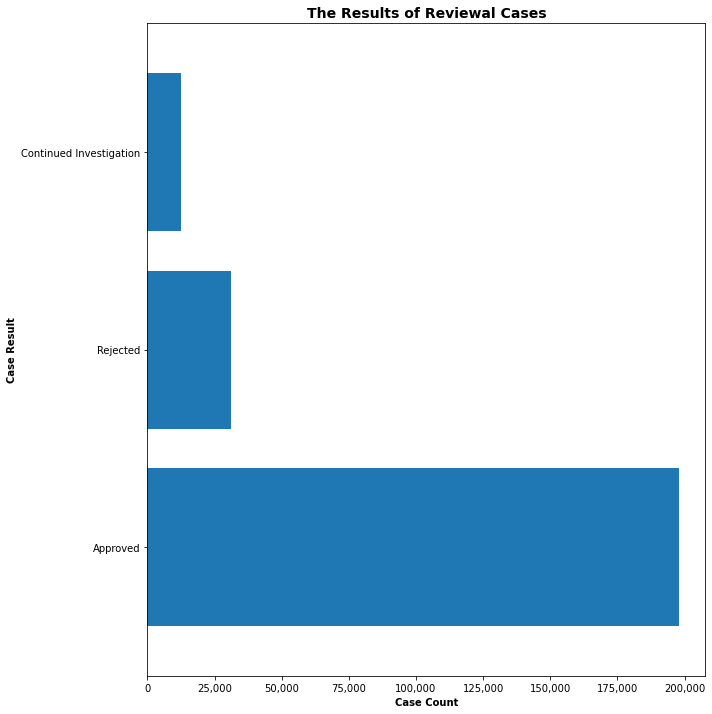

In [22]:
#visualizing the results of case reviewal from Cook County
#as a horizontal bar chart

fig, ax = plt.subplots(figsize = (10,10))

rr.plot(kind = 'barh', figsize = (10,12), zorder = 2, width = 0.8)
    
ax.set_title('The Results of Reviewal Cases', weight = 'bold', size = 14)
ax.set_ylabel('Case Result', weight = 'bold')
ax.set_xlabel('Case Count', weight = 'bold')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [23]:
#formatting the dataframe for a total count of felonies grouped by gender

g3 = df2['Gender'].value_counts().sort_values(ascending=False)
g3.head(4)

Male                          198719
Female                         30801
Unknown                           21
Male name, no gender given        11
Name: Gender, dtype: int64

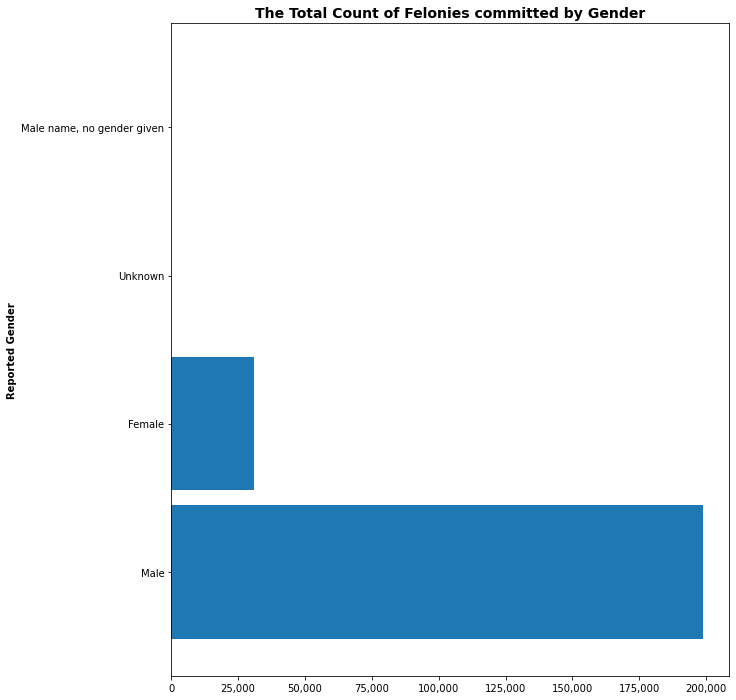

In [24]:
#visualizing the total count of felonies grouped by gender as a horizontal bar chart

fig, ax = plt.subplots(figsize = (10,10))

g3.plot(kind = 'barh', figsize = (10,12), zorder = 2, width = 0.9)
    
ax.set_title('The Total Count of Felonies committed by Gender', weight = 'bold', size = 14)
ax.set_ylabel('Reported Gender', weight = 'bold')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [25]:
#formatting the dataframe for a total count of felonies committed by ethnic group

ef = df_e['Ethnicity'].value_counts()
ef.head(4)

Black       276552
White        61802
Hispanic     11016
Asian         2888
Name: Ethnicity, dtype: int64

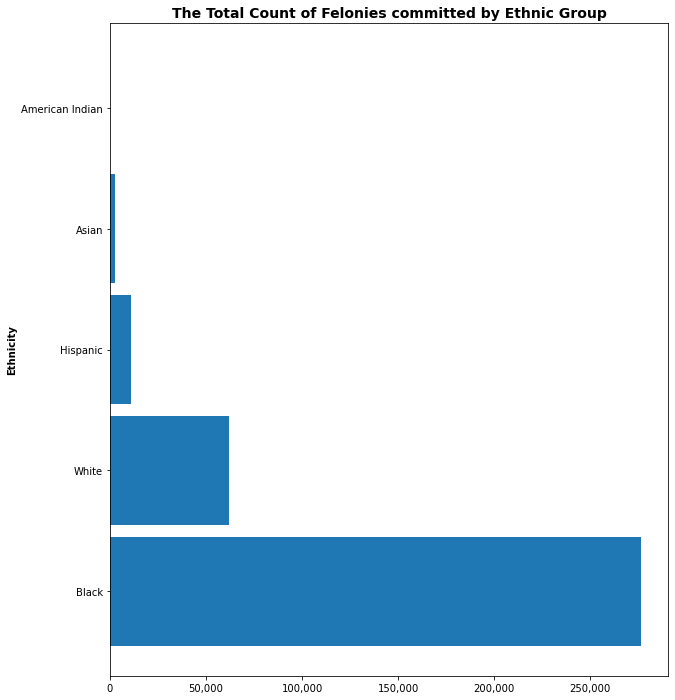

In [26]:
fig, ax = plt.subplots(figsize = (10,10))
ef.plot(kind = 'barh', figsize = (10,12), zorder = 2, width = 0.9)
    
ax.set_title('The Total Count of Felonies committed by Ethnic Group', weight = 'bold', size = 14)
ax.set_ylabel('Ethnicity', weight = 'bold')
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))